# Restaurant customers satisfaction

<p>This is a data analysis and classification project about restaurant customers satisfaction</p>

**required imports**

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import seaborn as sns
%matplotlib inline

**Import the data**

In [29]:
df = pd.read_csv('./restaurant_data.csv')

## Discover & customize our data
### Recognize the features

In [19]:
df.head(10)

,CustomerID,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
0,654,35,Male,83380,Weekly,27.829142,Chinese,Breakfast,3,Business,Takeaway,0,1,1,43.523929,2,5,4,0
1,655,19,Male,43623,Rarely,115.408622,American,Dinner,1,Casual,Dine-in,0,0,0,57.524294,5,5,3,0
2,656,41,Female,83737,Weekly,106.693771,American,Dinner,6,Celebration,Dine-in,0,1,0,48.682623,3,4,5,0
3,657,43,Male,96768,Rarely,43.508508,Indian,Lunch,1,Celebration,Dine-in,0,0,0,7.552993,4,5,1,0
4,658,55,Female,67937,Monthly,148.084627,Chinese,Breakfast,1,Business,Takeaway,0,0,1,37.789041,2,3,5,0
5,659,42,Female,28860,Monthly,111.064696,Chinese,Dinner,8,Celebration,Takeaway,0,1,1,26.853298,4,5,3,0
6,660,20,Female,131104,Weekly,120.236707,Indian,Lunch,6,Business,Dine-in,0,0,0,7.927917,5,4,1,0
7,661,51,Female,137882,Weekly,160.979098,Mexican,Dinner,6,Business,Dine-in,1,1,0,56.447210,4,3,3,0
8,662,27,Male,149638,Weekly,56.558632,Indian,Breakfast,5,Celebration,Takeaway,0,1,0,39.568188,2,4,5,0
9,663,32,Female,136145,Weekly,65.753455,Italian,Lunch,9,Casual,Takeaway,0,0,0,20.782469,4,3,1,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            1500 non-null   int64  
 1   Age                   1500 non-null   int64  
 2   Gender                1500 non-null   object 
 3   Income                1500 non-null   int64  
 4   VisitFrequency        1500 non-null   object 
 5   AverageSpend          1500 non-null   float64
 6   PreferredCuisine      1500 non-null   object 
 7   TimeOfVisit           1500 non-null   object 
 8   GroupSize             1500 non-null   int64  
 9   DiningOccasion        1500 non-null   object 
 10  MealType              1500 non-null   object 
 11  OnlineReservation     1500 non-null   int64  
 12  DeliveryOrder         1500 non-null   int64  
 13  LoyaltyProgramMember  1500 non-null   int64  
 14  WaitTime              1500 non-null   float64
 15  ServiceRating        

### Handle duplicates and NaN:s

In [21]:
df.duplicated().sum()

0

In [22]:
df.isna().sum()

CustomerID              0
Age                     0
Gender                  0
Income                  0
VisitFrequency          0
AverageSpend            0
PreferredCuisine        0
TimeOfVisit             0
GroupSize               0
DiningOccasion          0
MealType                0
OnlineReservation       0
DeliveryOrder           0
LoyaltyProgramMember    0
WaitTime                0
ServiceRating           0
FoodRating              0
AmbianceRating          0
HighSatisfaction        0
dtype: int64

***No NaNs or duplicates spoted***

## Modify the featues

In [23]:
# Completly useless
df.drop('CustomerID',axis=1,inplace=True)

In [24]:
# Merge some features
df["Mean_rating"] = df[["ServiceRating","FoodRating","AmbianceRating"]].mean(axis=1)
df['IncomeLevel'] = pd.cut(df["Income"],bins=5,labels=['very low','low','medium','high','very high'])
df.drop(["ServiceRating","FoodRating","AmbianceRating","Income"],axis=1, inplace = True)

In [25]:
df.head()

,Age,Gender,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,HighSatisfaction,Mean_rating,IncomeLevel
0,35,Male,Weekly,27.829142,Chinese,Breakfast,3,Business,Takeaway,0,1,1,43.523929,0,3.666667,medium
1,19,Male,Rarely,115.408622,American,Dinner,1,Casual,Dine-in,0,0,0,57.524294,0,4.333333,very low
2,41,Female,Weekly,106.693771,American,Dinner,6,Celebration,Dine-in,0,1,0,48.682623,0,4.000000,medium
3,43,Male,Rarely,43.508508,Indian,Lunch,1,Celebration,Dine-in,0,0,0,7.552993,0,3.333333,medium
4,55,Female,Monthly,148.084627,Chinese,Breakfast,1,Business,Takeaway,0,0,1,37.789041,0,3.333333,low


In [26]:
Numerical_feat=[]
Categorical_feat=[]
for feature in df.columns:
    if feature != 'HighSatisfaction':
        if df[feature].dtype=="object" or df[feature].dtype=="category":
                Categorical_feat.append(feature)
        else:
            Numerical_feat.append(feature)
Numerical_feat,Categorical_feat

(['Age',
  'AverageSpend',
  'GroupSize',
  'OnlineReservation',
  'DeliveryOrder',
  'LoyaltyProgramMember',
  'WaitTime',
  'Mean_rating'],
 ['Gender',
  'VisitFrequency',
  'PreferredCuisine',
  'TimeOfVisit',
  'DiningOccasion',
  'MealType',
  'IncomeLevel'])

## Visualize some valuable data

***Correlation heatmap over features***

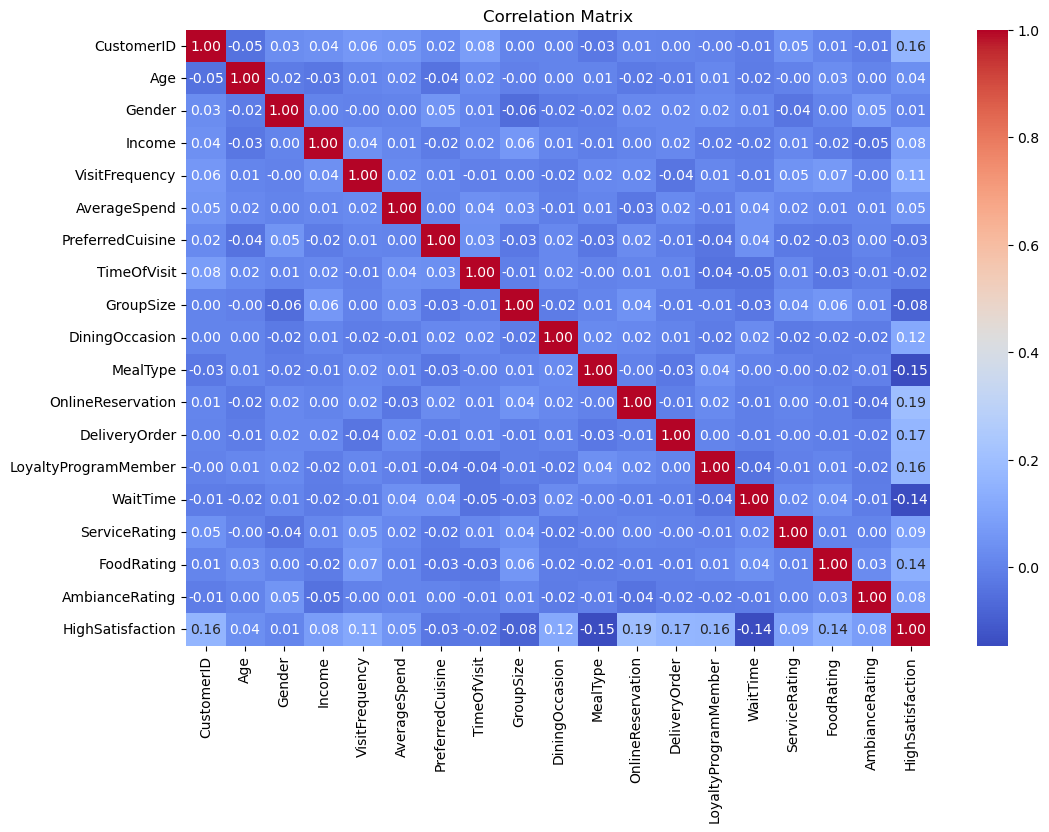

In [30]:
from sklearn.preprocessing import LabelEncoder

df_corr = pd.read_csv('./restaurant_data.csv')
# Encode categorical features
categorical_features = df_corr.select_dtypes(include=['object']).columns
for feature in categorical_features:
    le = LabelEncoder()
    df_corr[feature] = le.fit_transform(df_corr[feature])

# Calculate the correlation matrix
correlation_matrix = df_corr.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show();

**1. Distribution of Average Spend by Income Level**
<p>A bar plot that shows the spread and central tendency of spending across different income levels.</p>

**2. Average Spend by Gender and Visit Frequency**
<p>A bar plot that shows how spending habits differ between genders and how frequently they visit.</p>

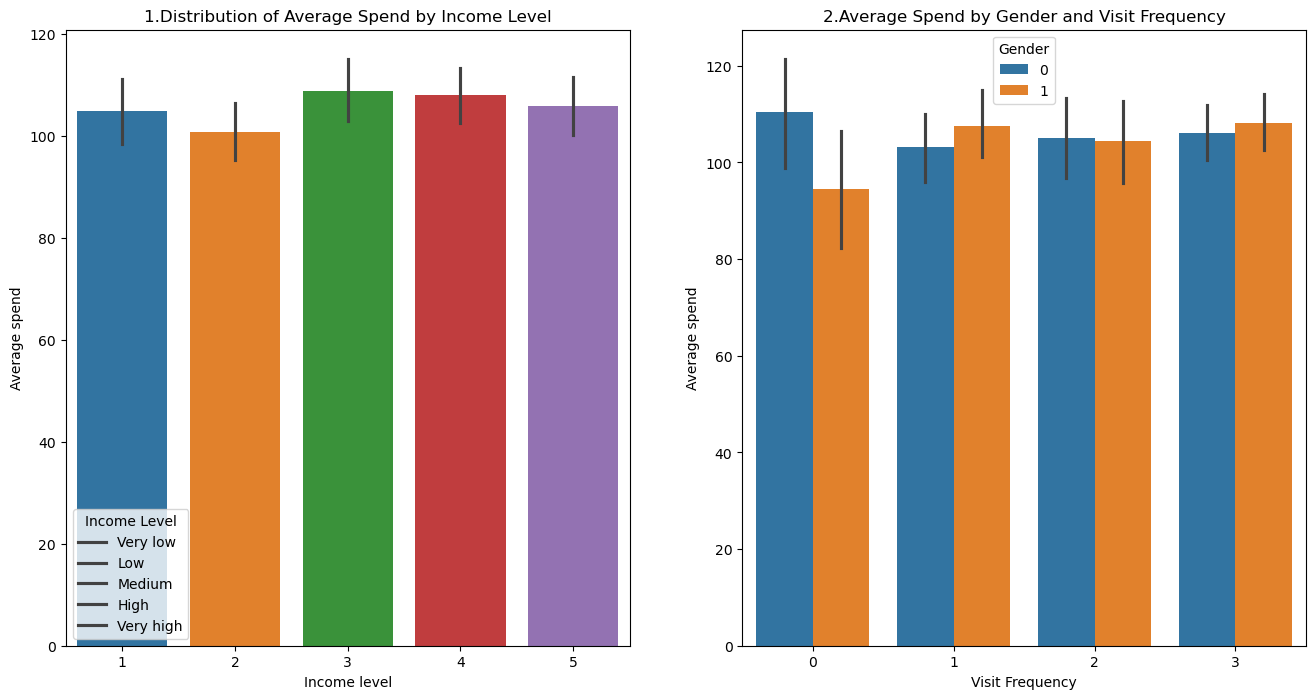

In [ ]:
fig, (ax1,ax2) = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(16,8)
)
sns.barplot(x='IncomeLevel', y='AverageSpend', data=df,hue='IncomeLevel',ax=ax1)
ax1.legend(title = 'Income Level',labels = ['Very low','Low','Medium','High','Very high']);
ax1.set(
    title = '1.Distribution of Average Spend by Income Level',
    xlabel = "Income level",
    ylabel = "Average spend"
);

sns.barplot(x='VisitFrequency', y='AverageSpend', hue='Gender', data=df, ax=ax2)

ax2.set(
    title = '2.Average Spend by Gender and Visit Frequency',
    xlabel = "Visit Frequency",
    ylabel = "Average spend"
);
ax2.legend(title = 'Gender');

**1. Distribution General satisfaction**
<p>A bar plot that shows the spread of satisfaction among the customers</p>

**2. Satisfaction Level by Preferred Cuisine**
<p>A count plot will illustrate the number of high satisfaction ratings for each type of cuisine.</p>

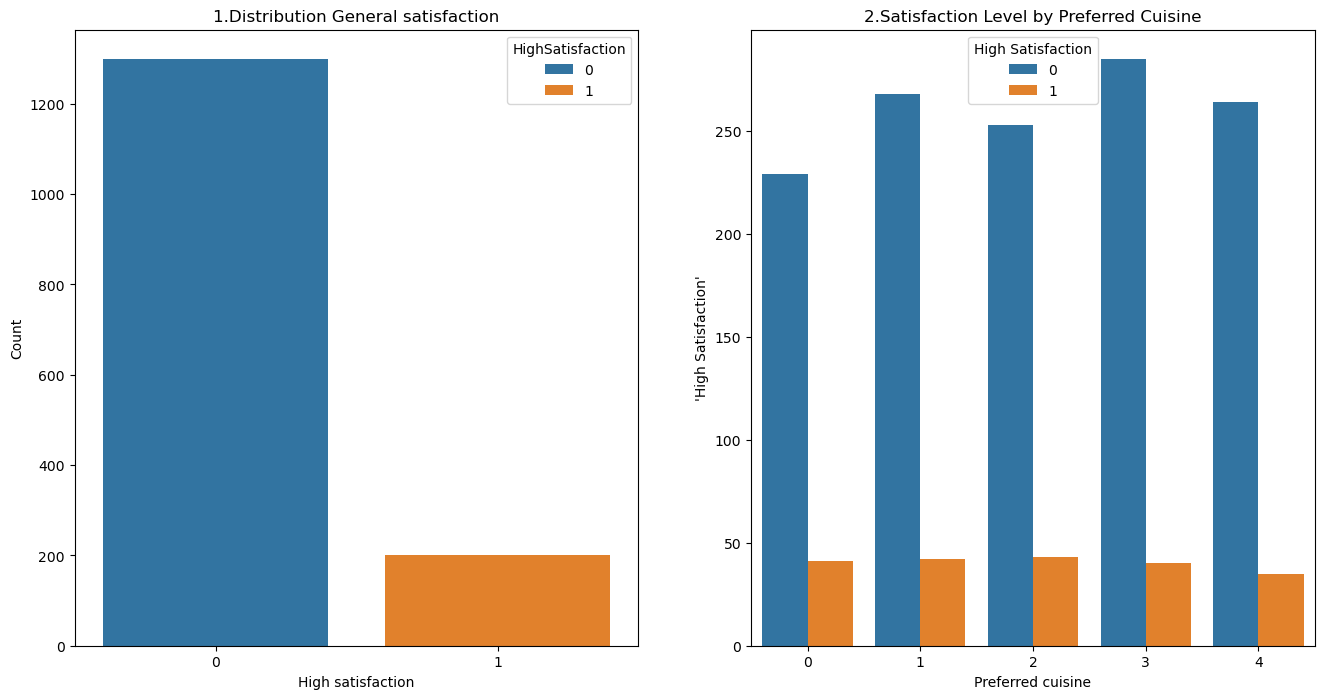

In [ ]:
fig, (ax1,ax2) = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(16,8)
)
sns.countplot(x='HighSatisfaction', data=df,hue='HighSatisfaction', ax=ax1)
ax1.set(
    title = '1.Distribution General satisfaction',
    xlabel = "High satisfaction",
    ylabel = "Count"
);

sns.countplot(x='PreferredCuisine', hue='HighSatisfaction', data=df, ax=ax2)

ax2.set(
    title = '2.Satisfaction Level by Preferred Cuisine',
    xlabel = "Preferred cuisine",
    ylabel = "'High Satisfaction'"
);
ax2.legend(title = 'High Satisfaction');

**1. Group Size vs. Average Spend**
<p>A scatter plot to explore the relationship between group size and average spending.</p>

**2. Wait Time and High Satisfaction**
<p>A box plot to see if there's a noticeable difference in wait times for high satisfaction versus lower satisfaction ratings.</p>

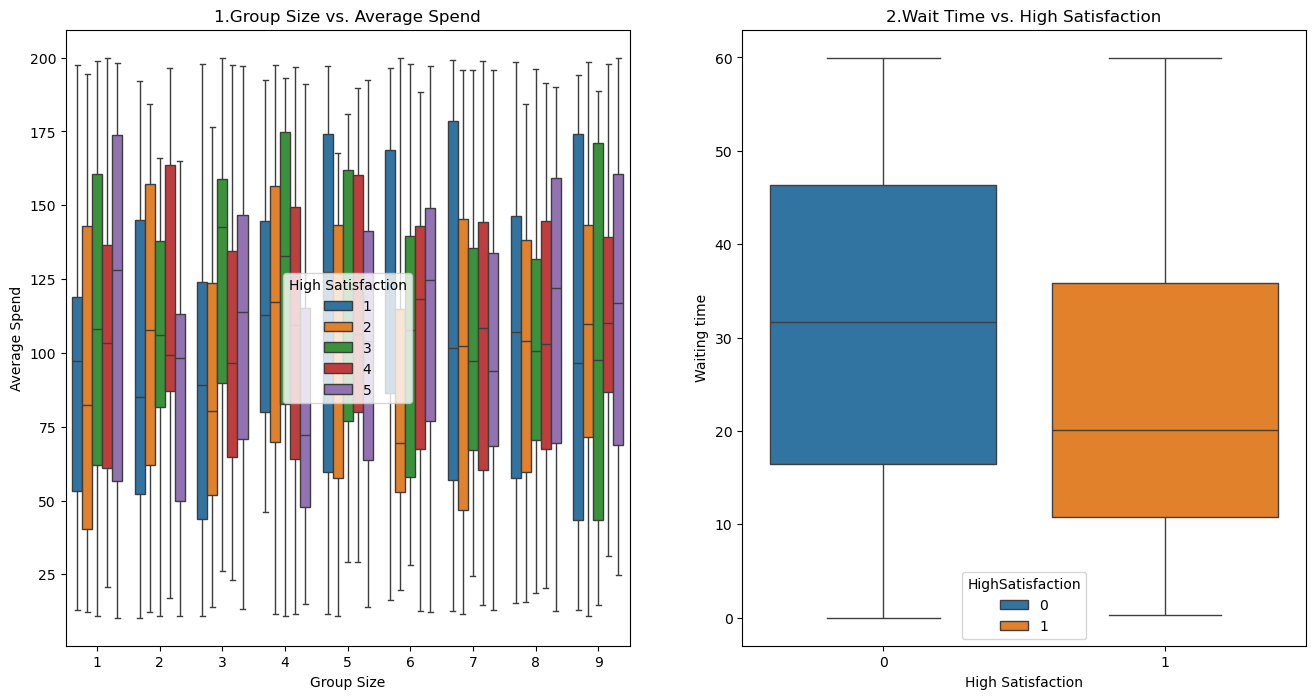

In [ ]:
fig, (ax1,ax2) = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(16,8)
)
sns.boxplot(x='GroupSize', y='AverageSpend', hue='IncomeLevel', data=df, ax=ax1)
ax1.set(
    title = '1.Group Size vs. Average Spend',
    xlabel = "Group Size",
    ylabel = "Average Spend"
);
ax1.legend(title='Income Level', loc='lower center')

sns.boxplot(x='HighSatisfaction', y='WaitTime',hue='HighSatisfaction', data=df, ax=ax2)
ax2.set(
    title = '2.Wait Time vs. High Satisfaction',
    xlabel = "High Satisfaction",
    ylabel = "Waiting time",
);
ax1.legend(title='High Satisfaction')



**1. Loyalty Program Membership and High Satisfaction**
<p>A bar plot to show the relationship between loyalty program membership and high satisfaction.</p>

**2. Loyalty Program Membership and Average Spend**
<p>A box plot to visualize the spread of average spending for members and non-members of the loyalty program.</p>

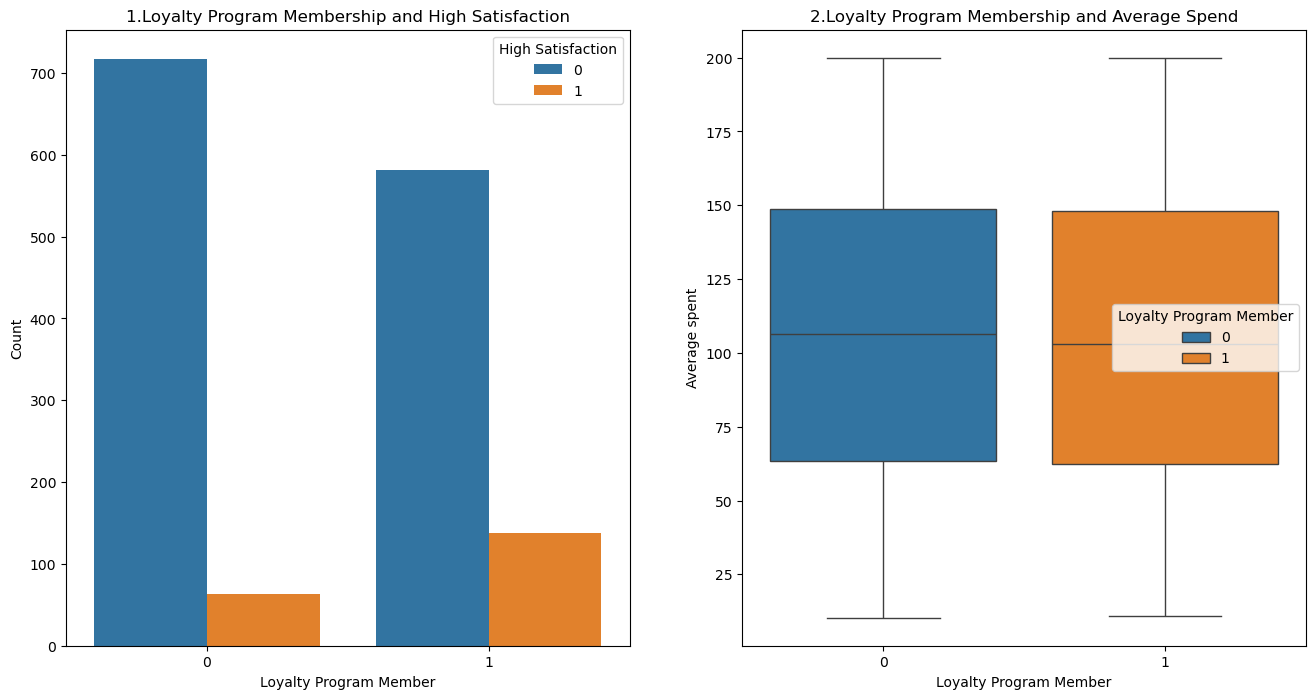

In [ ]:
fig, (ax1,ax2) = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(16,8)
)
sns.countplot(x='LoyaltyProgramMember', hue='HighSatisfaction', data=df, ax=ax1)
ax1.set(
    title = '1.Loyalty Program Membership and High Satisfaction',
    xlabel = "Loyalty Program Member",
    ylabel = "Count"
);
ax1.legend(title='High Satisfaction')

sns.boxplot(x='LoyaltyProgramMember', y='AverageSpend',hue='LoyaltyProgramMember', data=df, ax=ax2)
ax2.set(
    title = '2.Loyalty Program Membership and Average Spend',
    xlabel = 'Loyalty Program Member',
    ylabel = 'Average spent',
);
ax2.legend(title='Loyalty Program Member');


**1. Preferred cuisine by Gender**
<p>A bar plot to show cuisine preferences between genders.</p>

**2.Preferred cuisine by Visit time**
<p>A bar plot to show cuisine preferences by day time.</p>

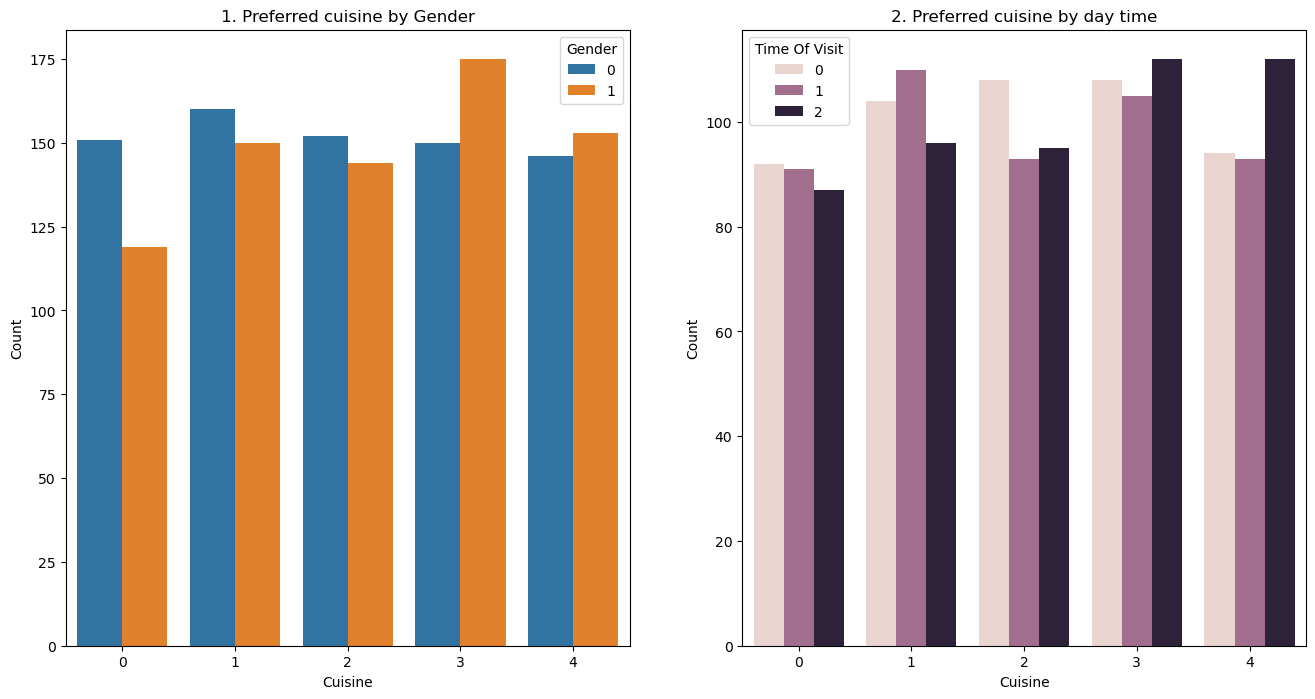

In [ ]:
fig, (ax1,ax2) = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(16,8)
)

sns.countplot(x='PreferredCuisine', hue='Gender', data=df,ax=ax1)
ax1.set(
    title = '1. Preferred cuisine by Gender',
    xlabel = "Cuisine",
    ylabel = "Count"
);
ax1.legend(title='Gender')

sns.countplot(x='PreferredCuisine', hue='TimeOfVisit', data=df,ax=ax2)
ax2.set(
    title = '2. Preferred cuisine by day time',
    xlabel = "Cuisine",
    ylabel = "Count"
);
ax2.legend(title='Time Of Visit');

**1. Visit Frequency by Income Level**
<p>A bar plot to show how visit frequency varies across different income levels</p>

**2. Satisfaction Rating by Dining Occasion**
<p>A bar plot to display the mean satisfaction rating for different dining occasions.</p>

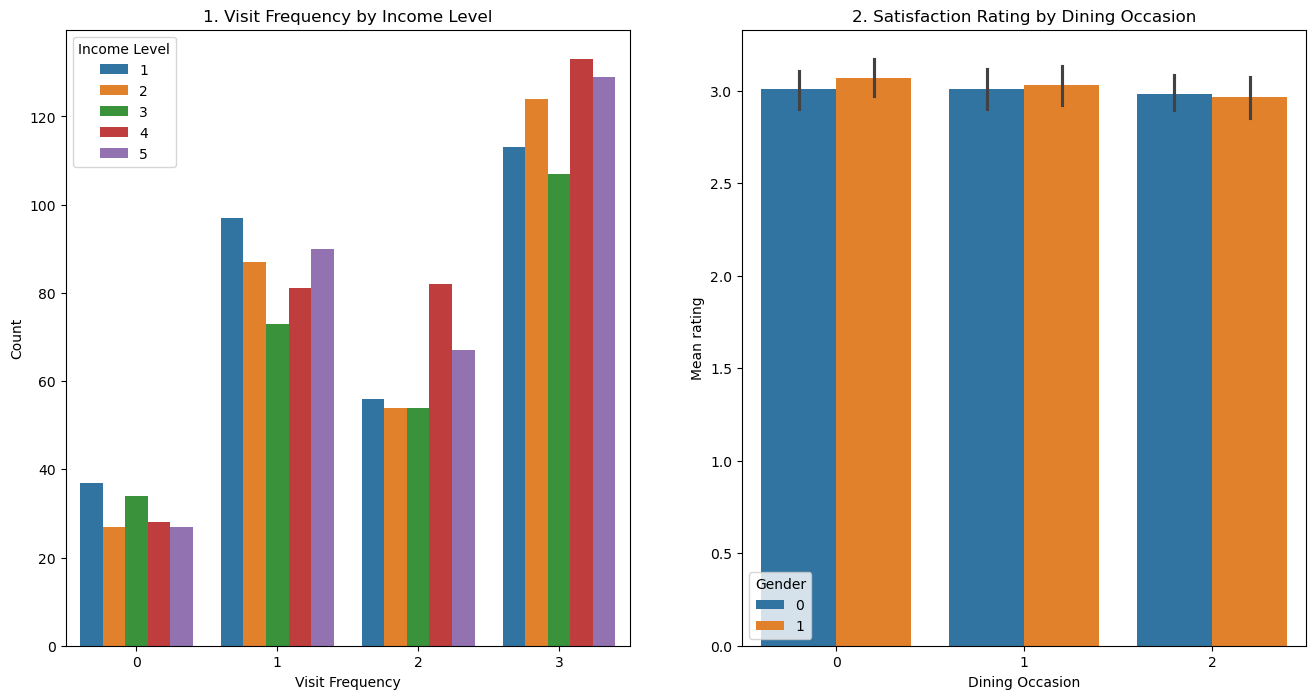

In [ ]:
fig, (ax1,ax2) = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(16,8)
)

sns.countplot(x='VisitFrequency', hue='IncomeLevel', data=df,ax=ax1)
ax1.set(
    title = '1. Visit Frequency by Income Level',
    xlabel = "Visit Frequency",
    ylabel = "Count"
);
ax1.legend(title='Income Level')

sns.barplot(x='DiningOccasion', y='Mean_rating', hue='Gender', data=df,ax=ax2)
ax2.set(
    title = '2. Satisfaction Rating by Dining Occasion',
    xlabel = "Dining Occasion",
    ylabel = "Mean rating"
);
ax2.legend(title='Gender');

**1. Average Spend by Meal Type**
<p>A bar plot to display the average spend for different meal types (Dine-in, Takeaway).</p>

**2. Mean Rating by Preferred Cuisine**
<p>A bar plot to display the mean satisfaction rating for different cuisines</p>

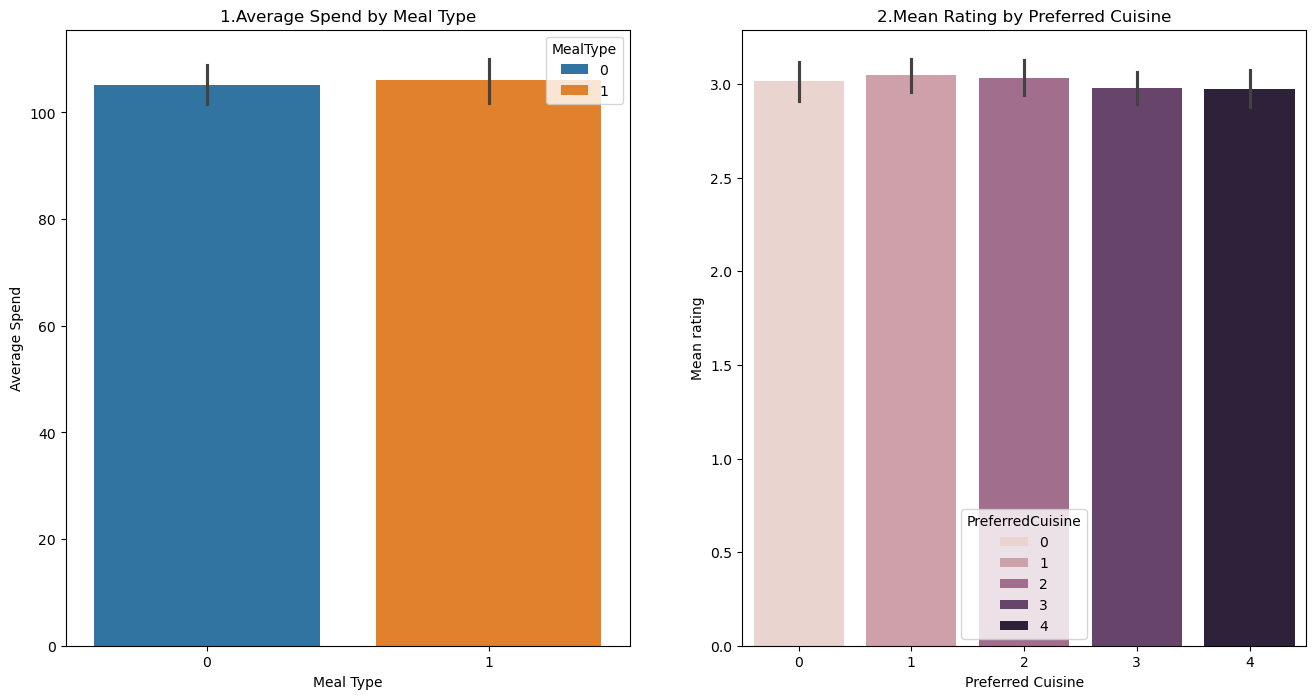

In [ ]:
fig, (ax1,ax2) = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(16,8)
)

sns.barplot(x='MealType', y='AverageSpend', hue='MealType', data=df, ax=ax1)
ax1.set(
    title = '1.Average Spend by Meal Type',
    xlabel = "Meal Type",
    ylabel = "Average Spend"
);

sns.barplot(x='PreferredCuisine', y='Mean_rating', hue='PreferredCuisine', data=df,ax=ax2)
ax2.set(
    title = '2.Mean Rating by Preferred Cuisine',
    xlabel = "Preferred Cuisine",
    ylabel = "Mean rating"
);


## Predicting High satisfaction

**Preparing models and finding highest regressor**

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

classification_models = {
                    "SGDClassifier": SGDClassifier(),
                    "SVC_linear": LinearSVC(),
                    "SVC": SVC(),
                    "xgboost": XGBClassifier(),
                    "knn": KNeighborsClassifier(),
                    "LR": LogisticRegression(),
                    "BGC": GradientBoostingClassifier(),
                    "RandomForestClassifier": RandomForestClassifier()}

# Create an empty dictionary for the classification results
classification_results = {}


categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, Categorical_feat),
        ('num', numeric_transformer, Numerical_feat)
    ]
)

X = df.drop('HighSatisfaction', axis=1)
y = df['HighSatisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop through the items in the classification_models dictionary
for model_name, model in classification_models.items():
    
    # Create a model Pipeline with a preprocessor step and model step
    model_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                                      ("model", model)])
    
    # Fit the model Pipeline to the car sales training data
    print(f"Fitting {model_name}...")
    model_pipeline.fit(X_train, y_train)
    
    # Score the model Pipeline on the test data appending the model_name to the 
    # results dictionary
    print(f"Scoring {model_name}...")
    classification_results[model_name] = model_pipeline.score(X_test, y_test)

classification_results

Fitting SGDClassifier...
Scoring SGDClassifier...
Fitting SVC_linear...
Scoring SVC_linear...
Fitting SVC...
Scoring SVC...
Fitting xgboost...
Scoring xgboost...
Fitting knn...


c:\Users\JamalHussein\Documents\machine learning\sample_project_1\env\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Scoring knn...
Fitting LR...
Scoring LR...
Fitting BGC...
Scoring BGC...
Fitting RandomForestClassifier...
Scoring RandomForestClassifier...


{'SGDClassifier': 0.7866666666666666,
 'SVC_linear': 0.91,
 'SVC': 0.9033333333333333,
 'xgboost': 0.88,
 'knn': 0.86,
 'LR': 0.9133333333333333,
 'BGC': 0.88,
 'RandomForestClassifier': 0.8766666666666667}

**Model tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters

param_grid = {
    'model__n_estimators': [100,200,300,1000,2000],
    'model__max_depth': [3,5,7],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.8, 1],
    'model__colsample_bytree': [0.8, 1]
}
xgb_clf = XGBClassifier()

pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                                                     ("model", xgb_clf)])
# Create a GridSearchCV object

grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           cv=5,
                           verbose=1,
                           n_jobs=-1) 

# Adjust GridSearchCV to training data
print("Fitting GridSearchCV...")
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

Fitting GridSearchCV...
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters found:  {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 1000, 'model__subsample': 0.8}
Best accuracy found:  0.9066666666666666


**Make prediction & Evaluate**

In [ ]:
from sklearn.metrics import recall_score, precision_score,accuracy_score,f1_score

def evaluate_preds(y_true, y_preds):
    """
        Performs evaluation comparison on y_true labes vs y_pred labels
    """
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred, average='weighted') * 100
    recall = recall_score(y_test, y_pred, average='weighted') * 100
    f1 = f1_score(y_test, y_pred, average='weighted') * 100
    metric_dict = {
        "accuracy": round(accuracy,2),
        "precision": round(precision,2),
        "recall": round(recall,2),
        "f1": round(f1,2),
    }
    return metric_dict

In [ ]:
y_pred = grid_search.predict(X_test)
evaluate_preds(y_pred,y_test)

{'accuracy': 89.67, 'precision': 88.57, 'recall': 89.67, 'f1': 88.09}

### Model Performance Summary
**The classification model exhibits the following performance metrics:**

Accuracy: 89.33% The model correctly classifies 89.33% of all observations. This is an overall measure of the model's ability to make accurate predictions across the dataset.

Precision: 88.24% When the model predicts a positive class, it is correct 88.24% of the time. Precision measures how many of the positive predictions are actually correct, which is crucial when false positives have significant consequences.

Recall: 89.33% The model identifies 89.33% of the actual positive examples. Recall measures how well the model finds all positive instances, and is important when capturing as many positive cases as possible is critical, even if it means including some false positives.

F1 Score: 87.36% The F1 score is the harmonic mean of precision and recall, providing a balanced assessment of the model's performance. With an F1 score of 87.36%, the model demonstrates a good balance between precision and recall.

### Conclusion
The model shows high accuracy and a good balance between precision and recall. An F1 score of 87.36% indicates that the model performs well in both identifying positive instances and minimizing misclassifications. Overall, the model is effective for the given task, with strong capability in both detecting positive cases and making correct positive predictions.

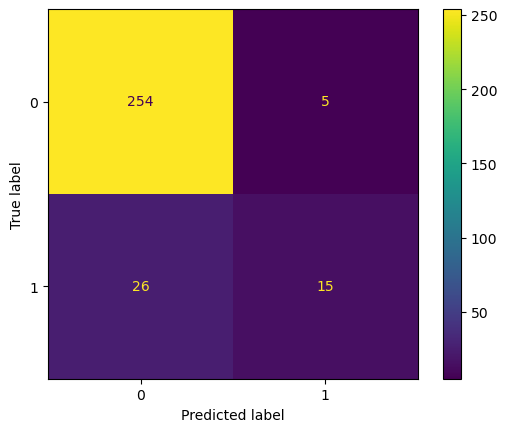

In [ ]:

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true = y_test,y_pred = y_pred);